<div align="center" style="margin: 0; padding: 0;">
    <h1 style="margin-bottom: 10px;"><b>КЛАСТЕРНЫЙ АНАЛИЗ</b></h1>
    <h2 style="margin-top: 10px;"><b>Введение в кластерный анализ</b></h2>
</div>


Ключевые маркеры и вопросы для самоконтроля

1. Для решения каких задач был придуман кластерный анализ?
2. Области применения кластерного анализа (3) 
3. Примеры -- Маркетинг -- Выборка Сайтов 
4. Как измерить сходство кластеров
5. Как вычислять расстояние
6. Расстояние Хэминга, Sorensen-Dice, Мера Жакарда
7. Кодирование категориальных данных
8. Алгоритм иерархического кластерного анализа
9. Когда прерывать процесс объединения в кластеры
10. График каменистая осыпь
11. Что лучше график каменистая осыпь или дендрограмма, в чем отличие
12. А почему просто не смотреть на диаграмму рассеивания
13. Участие аналитика (5) !!!!!!!!!!!!
14. Центроид, дисперсия, стандартное отклонение
15. Центрирование, нормирование, стандартизация
16. Отбор переменных
17. Автоматизация определения числа кластеров

Видеоматериал на YouTube (Вадим Аббакумов) [[ЛЕКЦИЯ_1]](https://www.youtube.com/watch?v=fIrhDECKwdc&list=PLi7wcJNcND_a-RRHCh7BC3Ibj4J-t7FYu&index=1)


**Для решения каких задач был придуман кластерный анализ?**

Кластерный анализ разделяет объекты на группы:
- Объекты внутри группы похожи между собой
- Объекты разных групп различаются

Определение количества групп - это часть задачи. 

Если мы работаем с таблицей данных, то каждому объекту соответствует *строка таблицы* и значит мы группируем строки. В результате кластерного анализа наблюдения распределяться по группам, которые мы будем называть **кластерами** (с анг. cluster - "сгусток", "скопление").

**Кластеризацией** - мы будем называть применение кластерного анализа к данным.

<u>Замечание:</u> очень часто по отношению к кластерному анализу применяют термин классификация, однако мы будем этого избегать. Кластерный анализ относится к методам *обучения без учителя*, поскольку алгоритм самостоятельно находит группы или кластеры в данных без предварительных меток. А вот термин классификация - мы будем относить к *методам обучения с учителем*. 

<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/1_image.jpg" alt="Классический пример" style="height:250px; width:auto; margin-right:10px; vertical-align: middle;">
    <img src="../images/2_image.jpg" alt="Вторая картинка" style="height:250px; width:auto; vertical-align: middle;">
</div>

Чтобы лучше понять, что же такое кластерный анализ и в каких ситуациях он применим запомните такую простую аналогию:

Кластеризация - группировка пользователей мобильной связи. Построение характерных портретов целевой аудитории. Например, у нас есть 3 группы людей: 

- *молодежь*, которая практически круглосуточно в сети и редко звонит куда-то; 
- *бабушки* с бабушкофонами, которые знают, как нажимать 3 кнопки, чтобы позвонить внуку или отправить смс и которые редко пользуются интернетом; 
- *предприниматели*, которые постоянно на трубке, то есть используют телефон как телефон. 

Оператор сотовой связи должен каждой отдельной группе предложить свой тариф, чтобы заработать больше денег. Кластерный анализ нужен как раз таки для того чтобы найти и выделить эти группы. 

<div style="text-align: center; margin-bottom: 20px;">
    <img src="../images/4_image.jpg" alt="Классический пример" style="height:300px; width:auto; margin-right:10px;">
</div>

**Области применения кластерного анализа:**
1. Сегментация (группировка)
2. Сокращение размерности
3. Выявление выбросов

Существует более 100 методов кластеризации данных. Мы рассмотрим наиболее популярные алгоритмы:
- Иерархический кластерный анализ
- Метод к-средних
- DBSCAN

---


<div align="center" style="margin: 0; padding: 0;">
    <h2 style="margin-top: 10px;"><b>Иерархический кластерный анализ.Теория.</b></h2>
</div>

Видеоматериал на YouTube (Вадим Аббакумов) [[ЛЕКЦИЯ_2]](https://www.youtube.com/watch?v=UgTX1dnCfPA&list=PLi7wcJNcND_a-RRHCh7BC3Ibj4J-t7FYu&index=2)

**Идея метода ИКА** - задача сводится к геометрической  
- Каждый объект - это точка в пространстве размерности $ \mathbb{R}^k $
- Похожие объекты расположены "близко" друг к другу
- Различные объекты расположены "далеко"
- Скопление точек - кластер

То же самое обсудим более подробно:
1) **Преобразуем таблицу данных в числовую матрицу**

Например, если бы таблица содержала не числовые, а категориальные значения, например пол: мужчины / женщины, мы бы их закодировали как мужчины = 0, женщины = 1

In [1]:
import pandas as pd

data = {
    "Возраст": [20, 25, 35, 40, 50, 55, 65, 70],
    "Пол": ["Мужчины", "Женщины", "Мужчины", "Женщины", "Мужчины", "Женщины", "Мужчины", "Женщины"]
}

df = pd.DataFrame(data)
print(df)

   Возраст      Пол
0       20  Мужчины
1       25  Женщины
2       35  Мужчины
3       40  Женщины
4       50  Мужчины
5       55  Женщины
6       65  Мужчины
7       70  Женщины


In [12]:
df["Пол"] = df["Пол"].replace({"Мужчины": 0, "Женщины": 1})
df

,Возраст,Пол
0,20,0
1,25,1
2,35,0
3,40,1
4,50,0
5,55,1
6,65,0
7,70,1


Существует несколько методов преобразования категориальных данных в числовые. Рассмотрим наиболее распространённые из них:

- One-Hot Encoding (Одноразовое кодирование)
- Label Encoding (Метки)
- Frequency Encoding (Кодирование частот)
- Hash Encoding (Хеш-кодирование)

1. **One-Hot Encoding (Одноразовое кодирование)**
Описание: Каждая категория преобразуется в отдельный бинарный (0 или 1) столбец. Это наиболее распространённый метод, особенно когда количество категорий невелико.

Преимущества:

- Не вводит порядковых отношений между категориями.
- Подходит для категориальных переменных с небольшим количеством уникальных значений.

Недостатки:

При большом количестве категорий количество столбцов может значительно увеличиться (проблема "проклятия размерности").

In [3]:
import pandas as pd

data = {
    "Возраст": [20, 25, 35, 40, 50, 55, 65, 70],
    "Пол": ["Мужчины", "Женщины", "Мужчины", "Женщины", "Мужчины", "Женщины", "Мужчины", "Женщины"]
}

df = pd.DataFrame(data)
print("Исходные данные:")
print(df)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Пол"], drop_first=True)
print("\nДанные после One-Hot Encoding:")
print(df_encoded)


Исходные данные:
   Возраст      Пол
0       20  Мужчины
1       25  Женщины
2       35  Мужчины
3       40  Женщины
4       50  Мужчины
5       55  Женщины
6       65  Мужчины
7       70  Женщины

Данные после One-Hot Encoding:
   Возраст  Пол_Мужчины
0       20         True
1       25        False
2       35         True
3       40        False
4       50         True
5       55        False
6       65         True
7       70        False


2. **Label Encoding (Метки)**
Описание: Каждой категории присваивается уникальное целое число.

Преимущества:

-- Простота реализации.
-- Не увеличивает размерность данных.

Недостатки:

Вводит искусственный порядковый порядок между категориями, что может не иметь смысла и искажать анализ.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Пол_Encoded'] = le.fit_transform(df['Пол'])
print("\nДанные после Label Encoding:")
print(df)



Данные после Label Encoding:
   Возраст      Пол  Пол_Encoded
0       20  Мужчины            1
1       25  Женщины            0
2       35  Мужчины            1
3       40  Женщины            0
4       50  Мужчины            1
5       55  Женщины            0
6       65  Мужчины            1
7       70  Женщины            0


3. **Frequency Encoding (Кодирование частот)**
Описание: Каждой категории присваивается частота её появления в данных.

Преимущества:

- Подходит для категориальных переменных с большим количеством уникальных значений.
- Сохраняет информацию о распространённости категорий.

Недостатки:

Может вводить информационную утечку в задачах с целевыми переменными (но в кластеризации это не критично).

In [6]:
# Frequency Encoding
freq_encoding = df['Пол'].value_counts() / len(df)
df['Пол_Freq_Encoded'] = df['Пол'].map(freq_encoding)
print("\nДанные после Frequency Encoding:")
print(df)



Данные после Frequency Encoding:
   Возраст      Пол  Пол_Encoded  Пол_Freq_Encoded
0       20  Мужчины            1               0.5
1       25  Женщины            0               0.5
2       35  Мужчины            1               0.5
3       40  Женщины            0               0.5
4       50  Мужчины            1               0.5
5       55  Женщины            0               0.5
6       65  Мужчины            1               0.5
7       70  Женщины            0               0.5


Двигаемся дальше, второй шаг

2) **Объекту сопоставляем точку в пространстве признаков**

- Каждая строка — это объект. Например, человек, город, товар, событие и тд.
- Каждый столбец — это характеристика (свойство) объекта. Например, возраст, пол, рост, размер, цвет и тд.

Визуализируем это на простом примере. Представим, что у нас есть несколько объектов, например, имена: Вася, Коля, Маша и Петя. Если каждому из них сопоставить только одно свойство, скажем, рост, то все эти объекты будут отображаться в виде точек на одномерной оси. Эта ось будет показывать, какой рост у кого. Так, у нас получится одна линия с точками, каждая из которых указывает на рост конкретного человека.

Теперь представим, что мы добавляем ещё одно свойство, например, возраст. В этом случае наши данные перемещаются из одномерного пространства в двумерное. Вместо одной линии мы получим плоскость с двумя осями: одна будет показывать рост, а другая — возраст. Теперь каждая точка на этой плоскости будет обозначать человека с двумя характеристиками: ростом и возрастом.

Если мы решим добавить ещё больше имён, например, Анну и Сергея, то на плоскости просто появится больше точек. Количество объектов увеличит количество точек, но никак не повлияет на размерность пространства

А вот если мы добавим ещё одно свойство, например, вес, то перейдём в трёхмерное пространство. Вместо плоскости у нас будет уже объёмное пространство, где каждой точке соответствуют три характеристики: рост, возраст и вес. И если добавлять новые свойства, размерность пространства будет расти. Так мы можем получить пространство с любым количеством измерений: 3D, 10D, 500D и так далее.


<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/7_image.jpg" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
    <img src="../images/6_image.jpg" alt="Вторая картинка" style="height:350px; width:auto; vertical-align: middle;">
</div>


3) **Объекты похожи если между ними маленькое расстояние**

Но когда объекты похожи? Как это понять?

Объекты похожи, когда соответсвующие элементы вектора (то есть числа находящиеся в одном и том же **столбце**) совпадают или очень мало отличимы друг от друга. Например Имя = [Вася, Коля, Маша] Рост = [185, 183, 165]. Рост у Васи и Коли мало отличим друг от друга, а вот Маша ниже пацанов.

Иногда объекты могут сильно отличаться друг от друга, но по одной или двум характеристикам. Например, совпали: рост, возраст, вес, пол, но цвет волос разный. 

А что происходит в геометрическом смысле?

Как мы уже поняли, если у нас в таблице будет k - столбцов, то есть k - свойств, у нас получится k - мерное пространство $ \mathbb{R}^k $. В этом пространстве каждую строку таблицы можно представить как точку, где координаты определяются значениями признаков. Понятие схожести объектов в таком многомерном пространстве сводется к измерению расстояния между точками: чем ближе точки расположены друг к другу, тем больше сходства между объектами, и наоборот, чем больше расстояние, тем значительнее различия между объектами.

Точки, которые находятся близко друг к другу объединяются в тучу, ну или по научному в кластер. *То есть получается, что нас в первую очередь интересует расстояние между этими точками.* Узнав расстояние мы узнаем какое количество классов у нас может получиться. 

Мы ищем сгустки, плотные скопления, тучки, кучи называйте как хотите )

<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/8_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>





Рассмотрим наиболее популярные расстояния, которые используются в кластерном анализе:

- Евклидово расстояние
- Квадрат Евклидова расстояния
- Манхетенское расстояние (расстояние L1, расстояние городских кварталов)
- Расстояние Хэмминга
- Мера Жакарда


https://tproger.ru/translations/3-basic-distances-in-data-science

Без пояснений в случае чего смотрим видос

In [8]:
#Пример расчета некоторых расстояний для 2х бинарных массивов данных

from sklearn.metrics import jaccard_score, hamming_loss
from scipy.spatial.distance import dice

# Пример бинарных векторов
A = [1, 0, 1, 1, 0]
B = [1, 1, 1, 0, 0]

# Расстояние Хэмминга
hamming_distance = hamming_loss(A, B) * len(A)
print(f'Hamming Distance: {hamming_distance}')

# Индекс Жаккара
jaccard = jaccard_score(A, B)
print(f'Jaccard Index: {jaccard}')

# Коэффициент Соренсена-Дайса
# scipy не имеет встроенной функции для Sorensen-Dice, но можно вычислить вручную
intersection = sum(a & b for a, b in zip(A, B))
dice_coeff = 2 * intersection / (sum(A) + sum(B))
print(f'Sorensen-Dice Coefficient: {dice_coeff}')

Hamming Distance: 2.0
Jaccard Index: 0.5
Sorensen-Dice Coefficient: 0.6666666666666666


Тепеь найдя кластеры, мы будем вычислять расстояние между ними. То есть расстояние уже не между точками, а между тучками. Опять же для того чтобы понять на сколько похожи кластеры точек. 

**Расстояние между кластерами** 

**Средне невзвешенное расстояние (Average linkage clustering).**
Берём каждую точку из одного кластера_А и каждую точку из другого кластера_В.Вычисляем расстояние между всеми возможными парами точек, где одна точка принадлежит кластеру А, а другая — кластеру В. Находим среднее арифметическое всех этих расстояний.

  $$
  \text{Average Linkage Distance} = \frac{1}{n \times m} \sum_{i=1}^{n} \sum_{j=1}^{m} d(\mathbf{x}_i, \mathbf{y}_j)
  $$

Пример вычисления

Предположим, у нас есть два кластера:
- Кластер $A$ с 3 точками
- Кластер $B$ с 4 точками

Мы вычисляем расстояние между каждой точкой из кластера $A$ и каждой точкой из кластера $B$. Поскольку в кластере $A$ 3 точки, а в кластере $B$ 4 точки, общее количество попарных расстояний будет 3 * 4 = 12

- Вычисляем все 12 попарных расстояний, суммируем их.
- Делим полученную суммы расстояний на 12

<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/9_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>

- **Центроидный метод (Centroid linkage)**
Расстояние между ксластерами = расстоянию между их центрами тяжести. Если известны все точки кластера, вычислить координаты центра тяжести (или центроида) можно, найдя среднее значение координат всех точек по каждой оси. Метод выходит из употребления.
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/10_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>


- **Метод дальнего соседа (Complete linkage).**
Принимают максимальное расстояние из всех вычисленных значений.
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/12_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>


- **Метод ближайшего соседа (Simple linkage).**
Принимают минимальное расстояние из всех вычисленных значений.Особенный метод, он способен вычислять ленточные кластеры 
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/11_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>

- **Метод Варда (WARD).** ВАЖНО! предполагает использование квадрата евклидова расстояния, но это требование нарушается в Python. Очень хороший метод. 
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/13_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>

**Рекомендации новичкам**
- Метод Варда - шаровые скопления
- Метод ближнего соседа - ленточные кластеры
- Среднее невзвешенное расстояние - шаровые скопления

---

Далее в видеоролике идет подробное объяснение того как работает метод иерархического кластерного анализа (ИКА) начиная с 34:50

**Алгоритм иерархического кластерного анализа**
1. Каждый объект объявляется кластером
2. Выбираем 2 ближайших кластера и объединяем их
3. Далее Выбираем 2 ближайших кластера и объединяем их
4. Далее Выбираем 2 ближайших кластера и объединяем их
5. и тд

Спрашивается а когда прервать этот процесс? Когда расстояние между объединяемыми кластерами становится очень большим. Почему? потому что большое расстояние = не похожие объекты. А нам не нужно объединять сильно различающиеся объекты. А как именно происходит остановка узнаем в следуюещй лекции. 

<div align="center" style="margin: 0; padding: 0;">
    <h2 style="margin-top: 10px;"><b>Как найти число кластеров. Дендрограмма и каменистая осыпь.</b></h2>
</div>

Видеоматериал на YouTube (Вадим Аббакумов) [[ЛЕКЦИЯ_3]](https://www.youtube.com/watch?v=DwPT0aCaepQ&list=PLi7wcJNcND_a-RRHCh7BC3Ibj4J-t7FYu&index=3)


На что мы опираемся когда определяем число кластеров в ходе ИКА. Сначала объединяются близкие, а значит, похожие кластеры, и на каждом новом шаге объединения объединяются всё более далекие, всё менее похожие кластеры. Аналитик ловит момент, когда начинают объединяться кластеры, состоящие из непохожих объектов.Тут-то он останавливает процесс объединения кластеров. Число кластеров на момент остановки и будет решением.



**Алгоритм построения дендрограммы (рекомендуется смотреть видеоролик)**

На диограмме рассеивания даны 5 точек. Расстояние между объектами будем вычислять по формуле Манхетен. Расстояние между кластерами будем измерять средним попарных расстояний. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os

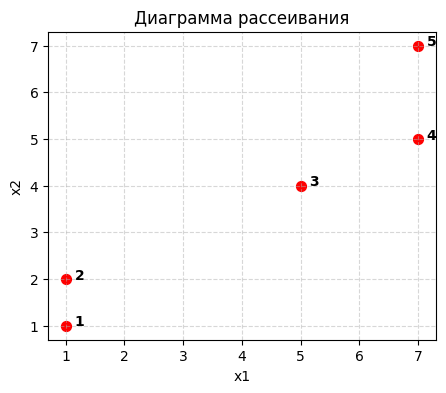

In [4]:

# Исходные данные
x1 = [1,1,5,7,7]
x2 = [1,2,4,5,7]
label1 = ["1","2","3","4","5"]

# Строим диаграмму рассеивания
plt.figure(figsize=(5, 4))
plt.scatter(x1, x2, color='red', s=50)  # Рисуем точки красного цвета с увеличенным размером
for i, label in enumerate(label1):
    plt.text(x1[i] + 0.15, x2[i], label, fontsize=10, fontweight='bold')  # Добавляем подписи к точкам

# Настройка графика
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Диаграмма рассеивания")
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

Забежим вперед и посмортим какой результат по итогу мы хотим получить.

<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/15_image.png" alt="Классический пример" style="height:350px; width:auto; margin-right:10px; vertical-align: middle;">
</div>

Дендрограмма описывает процесс объединения начавшийся с n одноточечных кластеров. У нас n = 5. Имена наших объектов 1 2 3 4 5. Нет закона, что объекты на дендрограмме должны следовать в порядке нумерации, их можно свободно переставлять для лучшей визуализации. 

**Правила построения:**

1. Каждому кластеру соответсвует вертикальная линия. Каждый отображается вертикальной линией и исходный и промежуточный и окончательный буквально каждый кластер.
 
2. Каждое объединение кластеров обозначается горизонтальной линией.

**Начинаем построение:**

Используем ИКА. Каждый объект объявляется кластером. Выбираем 2 ближайших кластера и объединяем их. Из диограммы рассеивания видно, что наименьшее расстояние между точками 1 и 2. 

Напомню, что для расчета расстояния используется Манхетенский способ. Давайте ради примера посчитаем расстояние между 1 и 2 их координаты (1,1) и (1,2), следовательно distance = |1-1| + |1-2| = 1. То есть расстояние между кластерами 1 и 2 в момент объединения равняется единице. 

В результате видим, что изначально у нас было 5 кластеров, а стало 4 так как кластеры 1 и 2 были объединены на высоте = 1. 

Продолжаем построение аналогичным образом, выбираем 2 ближайших кластера и объединяем их.

---

In [5]:
# Делаем из наших исходников дата фрейм

df1 = pd.DataFrame(list(zip(x1,x2)), columns = ['x1', 'x2'])
print(df1)

   x1  x2
0   1   1
1   1   2
2   5   4
3   7   5
4   7   7


In [6]:
# Нужны 3 процедуры - дендрограмма, ИКА, 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

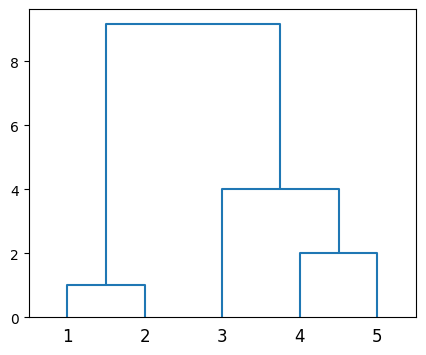

In [7]:
#Кластерный анализ 

plt.figure(figsize=(5, 4))

#Расстояние между кластерами будем измерять средним попарных расстояний (average)
#Расстояние между объектами будем вычислять по формуле Манхетен (cityblock)
# linkage() - функция которая выполняет ИКА
link = linkage(df1, method='average', metric='cityblock')

dn = dendrogram(link, 
                # color_threshold - Параметр, который определяет, какие части дендрограммы должны быть раскрашены. 
                #Указав -1, вы указываете, что вся дендрограмма должна быть одного цвета
                color_threshold = -1,
                # массив с названими объектов для подписи по оси Х
                labels = label1)


In [8]:
# Давайте посмотрим на результат выполнения функции linkage 
link

#Двигаемся по строкам
#Первые два элемента - это номера кластеров, которые объединяются
#Третий элемент - это расстояние между ними 
# Четветрый элемент - это размер нового кластера, то есть количество объектов в кластере

# Общая схема [array([кластер_1, кластер_2, расстояние, размер нового кластера])]

array([[0.        , 1.        , 1.        , 2.        ],
       [3.        , 4.        , 2.        , 2.        ],
       [2.        , 6.        , 4.        , 3.        ],
       [5.        , 7.        , 9.16666667, 5.        ]])

In [9]:
# Выведем отдельно расстояния между кластерами по итогам ИКА
link[:,2]

array([1.        , 2.        , 4.        , 9.16666667])

**На этом этапе построение дендрограммы завершено**

---

**Интерпритация результатов** 

Мы построили дендрограммы, теперь пришло самое время разобраться, а зачем мы это сделали, какую информацию из них извлекать и как их использовать. 

Вспоминаем, что наша главная цель как аналитиков - это поймать момент, когда надо остановить процесс объединения кластеров. Для этого нужно найти скачок в расстояних.  

Для этих целей обычно используется график **Каменистая осыпь.**

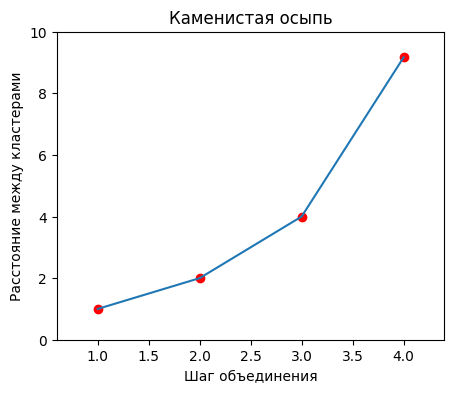

In [10]:
#Каменистая осыпь

plt.figure(figsize=(5, 4))

#Изобразили на графике точки
plt.scatter([1,2,3,4], link[:,2], c = "r")

#Соединили их линиями
plt.plot([1,2,3,4], link[:,2])

# Устанавливаем пределы осей
plt.xlim(0.6,4.4)
plt.ylim(0.0, 10.0)

# Заголовок графика
plt.title("Каменистая осыпь", fontdict=None, loc='center')

# Добавляем подписи к осям
plt.xlabel("Шаг объединения")
plt.ylabel("Расстояние между кластерами")

# Показываем график
plt.show()

In [ ]:
#В общем случае действуем аналогично

# Извлекаем расстояния между кластерами
dist = link[:,2]

# Переворачиваем массив расстояний для построения графика
#dist_rev = dist[::-1]

# Создаем индекс для каждого шага объединения
idxs = range(1, len(dist) + 1)

# Строим график каменистой осыпи
plt.figure(figsize=(8, 5))
plt.plot(idxs, dist, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.grid(True)
plt.show()

График представляется в виде линейного сплайна, где по оси Х - номер шага объединения, по оси У - расстояние между кластерами в момент объединения [1, 2, 4, 9.166] 

Из графика видно, что изначально расстояние увеличивалось незначительно, а на 3 шаге оно резко увеличилось с 4 до 9.166. Следовательно мы должны остановиться именно на 3 шаге, то есть перед тем как расстояние резко возрастет.

**Конспект выполнен до 21:30, далее рекомендуется смотреть видеоролик.**

---

<div align="center" style="margin: 0; padding: 0;">
    <h2 style="margin-top: 10px;"><b>Стандартизация переменных. Отбор переменных для анализа</b></h2>
</div>

Видеоматериал на YouTube (Вадим Аббакумов) [[ЛЕКЦИЯ_5]](https://www.youtube.com/watch?v=IEpmKMIl90M&list=PLi7wcJNcND_a-RRHCh7BC3Ibj4J-t7FYu&index=5)


**Участие аналитика в ходе кластерного анализа**

1. Метод стандартизации
2. Отбор переменных
3. Расстояние между кластерами
4. Расстояние между объектами
5. Число кластеров


### Необходимая терминология

Прежде чем начать говорить о методах стандартизации необходимо ввести пару необходимых терминов.

---
### **Центроид**
**Центроид** — это точка, представляющая собой среднее значение всех точек в наборе данных по всем координатам. 

  $$
  \text{Центроид} = \left( \frac{\sum x_1}{n}, \frac{\sum x_2}{n}, \dots, \frac{\sum x_k}{n} \right)
  $$
  где $ x_1, x_2, \dots, x_k $ — координаты точек, $ n $ — общее количество точек.

**Пример**  
Рассмотрим конкретный пример с набором точек в двумерном пространстве. Допустим, у нас есть следующие точки с координатами:
    - $ (2, 3) $
    - $ (4, 5) $
    - $ (6, 7) $

<p></p>

Чтобы найти центроид этих точек, мы посчитаем средние значения по каждой координате.

1. Считаем среднее значение по $ x $-координате:
   $$
   \frac{2 + 4 + 6}{3} = \frac{12}{3} = 4
   $$

2. Считаем среднее значение по $ y $-координате:
   $$
   \frac{3 + 5 + 7}{3} = \frac{15}{3} = 5
   $$

3. Таким образом, центроид этих точек имеет координаты:
  $$
  (4, 5)
  $$

---

### **Дисперсия**

**Дисперсия (Variance, Var)**: Это мера того, насколько точки разбросаны вокруг среднего значения (центроида)  по каждой координате. Она показывает степень рассеивания данных.
    
  $$
  \text{Дисперсия} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
  $$
  где $ x_i $ — каждое значение в наборе данных, $ \bar{x} $ — среднее значение (центроид).

**Пример**
Рассмотрим простой пример с набором данных: 3, 5, 7, 9, 11.

1. **Находим среднее значение ($ \bar{x} $):**
   $$
   \bar{x} = \frac{3 + 5 + 7 + 9 + 11}{5} = \frac{35}{5} = 7
   $$

2. **Вычисляем отклонения каждой точки от среднего и возводим в квадрат:**
$$ (3 - 7)^2 = (-4)^2 = 16 $$
$$ (5 - 7)^2 = (-2)^2 = 4 $$
$$ (7 - 7)^2 = 0^2 = 0 $$
$$ (9 - 7)^2 = 2^2 = 4 $$
$$ (11 - 7)^2 = 4^2 = 16 $$

3. **Находим среднее значение этих квадратов:**
   $$
   \text{Var} = \frac{16 + 4 + 0 + 4 + 16}{5} = \frac{40}{5} = 8
   $$

**Важно**: Дисперсия измеряется в квадратных единицах (например, если исходные данные были в метрах, дисперсия будет в квадратных метрах), поэтому её иногда сложно интерпретировать напрямую.


<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/20_image.png" alt="Классический пример" style="height:250px; width:auto; margin-right:10px; vertical-align: middle;">
</div>


---

### **Стандартное отклонение**
**Стандартное отклонение (Standard Deviation) (Обозначения - SD, $ \sigma $)**: Это квадратный корень из дисперсии. Оно также показывает разброс данных, но измеряется в тех же единицах, что и сами данные, поэтому его легче интерпретировать.
  $$
  \text{Стандартное отклонение} = \sqrt{\text{Дисперсия}}
  $$

  $$
  \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
  $$

где:
- $ \sigma $ — стандартное отклонение (Standard Deviation),
- $ x_i $ — каждое значение в наборе данных,
- $ \bar{x} $ — среднее значение (Mean),
- $ n $ — количество значений.



  
Представьте, что у вас есть набор данных с доходами пяти человек: 30,000 рублей, 32,000 рублей, 34,000 рублей, 36,000 рублей, 38,000 рублей.

1. Находим среднее значение:
   $$
   \bar{x} = \frac{30,000 + 32,000 + 34,000 + 36,000 + 38,000}{5} = 34,000 \, \text{рублей}
   $$

2. Вычисляем отклонения каждой суммы от среднего и возводим в квадрат:

$$ (30,000 - 34,000)^2 = (-4,000)^2 = 16,000,000 \, \text{руб}^2 $$
$$ (32,000 - 34,000)^2 = (-2,000)^2 = 4,000,000 \, \text{руб}^2 $$
$$ (34,000 - 34,000)^2 = 0^2 = 0 \, \text{руб}^2 $$
$$ (36,000 - 34,000)^2 = 2,000^2 = 4,000,000 \, \text{руб}^2 $$
$$ (38,000 - 34,000)^2 = 4,000^2 = 16,000,000 \, \text{руб}^2 $$  

4. Находим дисперсию:

   $$
   \text{Var} = \frac{16,000,000 + 4,000,000 + 0 + 4,000,000 + 16,000,000}{5} = 8,000,000 \, \text{руб}^2
   $$



5. Находим стандартное отклонение (SD):
   $$
   \sigma = \sqrt{8,000,000} \approx 2,828 \, \text{рублей}
   $$

Замететьте:

- **Дисперсия** измеряет разброс данных, но выражена в **квадратных единицах** (в данном примере — в рублях в квадрате, руб$^2$), что сложно интерпретировать. Например, "8,000,000 руб$^2$" не имеет прямого смысла в реальной жизни.

<p></p>

- **Стандартное отклонение** - преобразует этот разброс обратно в **оригинальные единицы** (в нашем случае — в рубли), что легче понять. Например, "2,828 рублей" показывает, насколько доходы в среднем отклоняются от среднего значения.

---

ДОПОЛНЕНИЕ

**Популяция** (или генеральная совокупность) — это все возможные элементы, которые нас интересуют в исследовании. Например, если вы изучаете рост всех взрослых людей в мире, то популяция — это все взрослые люди в мире. 

**Выборка** — это подмножество элементов, взятое из популяции. В реальных исследованиях часто невозможно собрать данные обо всех элементах популяции, поэтому мы берем лишь часть — выборку, которая должна быть репрезентативной, чтобы хорошо отражать характеристики всей популяции. Например, если вы изучаете рост взрослых людей, и у вас есть данные только о росте 1000 человек, это ваша выборка.

### **Генеральное и выборочное стандартное отклонение**

1. **Генеральное стандартное отклонение ($ \sigma $)**
   Когда у вас есть данные о **всей популяции**, вы используете формулу для генерального стандартного отклонения:
   $$
   \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
   $$
   где:
   - $ n $ — общее количество элементов в популяции.
   - $ x_i $ — каждое значение данных.
   - $ \bar{x} $ — среднее значение по всем элементам популяции.

<p></p>

2. **Выборочное стандартное отклонение ($ s $)**
   Когда у вас есть **выборка** из популяции, вы используете формулу для выборочного стандартного отклонения:
   $$
   s = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
   $$
   где:
   - $ n $ — общее количество элементов в выборке.
   - $ x_i $ — каждое значение данных.
   - $ \bar{x} $ — среднее значение по всем элементам выборки.<br>

  
Суть: Выборочное стандартное отклонение добавляет корректировку (делитель $ n - 1 $), чтобы получить несмещённую оценку разброса для всей популяции.

### **Что такое смещённая и несмещённая оценка?**

- **Смещённая оценка**: Оценка считается смещённой, если она **систематически** отличается от истинного значения параметра популяции. Если бы мы использовали делитель $ n $ в формуле для выборочного стандартного отклонения (как для генерального), это привело бы к заниженной оценке истинной дисперсии и стандартного отклонения популяции.
  
- **Несмещённая оценка**: Оценка считается несмещённой, если она в среднем равна истинному значению параметра популяции. Использование делителя $ n - 1 $ в формуле выборочного стандартного отклонения исправляет это смещение и даёт более точное представление о разбросе данных в популяции.

### **Простой пример, чтобы понять разницу**
Представьте, что у вас есть рост трёх человек: 160 см, 170 см и 180 см. Если у вас есть данные только об этих трёх людях, и вы хотите вычислить стандартное отклонение, вы работаете с **полной популяцией**, и можно использовать формулу с делителем $ n $.

Но если вы рассматриваете этих трёх человек как **выборку** из всех людей в мире, вы используете формулу с делителем $ n - 1 $, чтобы скорректировать оценку для всей популяции.

---


### **Центрирование**

**Центрирование** — это операция, после которой типичное значение переменной становится равным 0. Чаще всего это достигается путём вычитания среднего арифметического (иногда медианы) из каждого элемента столбца. После центрирования среднее арифметическое по столбцу становится равным 0.

**Пример**  
Предположим, у нас есть набор данных: 5, 10, 15.
- **Находим среднее значение:**
  $$
  \bar{x} = \frac{5 + 10 + 15}{3} = 10
  $$
- **Центрируем данные, вычитая среднее из каждого значения:**
  - $ 5 - 10 = -5 $
  - $ 10 - 10 = 0 $
  - $ 15 - 10 = 5 $

Теперь центрированный набор данных: -5, 0, 5. Среднее значение этого набора равно 0.

### Геометрический смысл центрирования

**Визуальная интерпретация:**  
Представьте облако точек, распределённых в двумерном пространстве. Центрирование сдвигает это облако таким образом, чтобы центр облака оказался на пересечении осей \( x = 0 \) и \( y = 0 \). Таким образом, центрирование приводит данные в симметричное расположение относительно начала координат.

**Геометрически:**  
Центрирование перемещает данные так, чтобы их среднее значение (центр масс) находилось в начале координат.


<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/19_image.png" alt="Классический пример" style="height:250px; width:auto; margin-right:10px; vertical-align: middle;">
</div>

---

Термин **"нормирование"** может иметь **разные значения** в зависимости от контекста. Рассмотрим два основных варианта:

### Нормирование в анализе данных

В этом случае нормирование — это преобразование данных в определённый диапазон, обычно от 0 до 1. Это делается для того, чтобы данные имели одинаковый масштаб и были сравнимы между собой.

- **Формула для нормирования:**
  $$
  x_{\text{норм}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$


Важно! - Min-Max нормализация сильно зависит от наличия выбросов в данных. 

#### Пример

Пусть у нас есть данные: 100, 300, 500.

1. Минимальное значение: 100  
2. Максимальное значение: 500  

Применим нормирование:
$$
\begin{align*}
\frac{100 - 100}{500 - 100} &= 0 \quad \\[10pt]
\frac{300 - 100}{500 - 100} &= 0.5 \quad \\[10pt]
\frac{500 - 100}{500 - 100} &= 1
\end{align*}
$$

**Нормированные значения:** 0, 0.5, 1.


### Нормирование в векторной математике

Векторное нормирование — это приведение длины (нормы) вектора к 1. 

- **Формула для нормирования вектора:**
  $$
  \text{Вектор нормированный} = \frac{\text{Вектор}}{\|\text{Вектор}\|}
  $$
  где $ \|\text{Вектор}\| $ — длина вектора (норма $ L^2 $).


- Где длина вектора

$$
\text{Пусть } \mathbf{v} = (v_1, v_2, \dots, v_n) \text{ — вектор в } \mathbb{R}^n.
$$

$$
\text{Тогда длина (норма) вектора } \|\mathbf{v}\| \text{ определяется как: }
$$

$$
\|\mathbf{v}\| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}.
$$

#### Пример

Пусть у нас есть вектор \( (3, 4) \).

1. Длина вектора:
   $$
   \|\text{Вектор}\| = \sqrt{3^2 + 4^2} = 5
   $$
2. Нормированный вектор:
   $$
   \left( \frac{3}{5}, \frac{4}{5} \right) = (0.6, 0.8)
   $$

Длина нормированного вектора: 1.


**Геометрический смысл:**

**Цель:** Преобразовать данные в заданный масштаб, например, в диапазон [0, 1] (Min-Max нормализация) или сделать все векторы данных единичной длины (векторная нормализация).

**Min-Max нормализация:** Данные сжимаются или растягиваются так, чтобы они находились в пределах заданного диапазона. Геометрически это можно представить как сжатие или растяжение облака точек вдоль всех осей, приводя все значения в указанный интервал. Форма облака при этом может сильно измениться, особенно если распределение исходных данных было неравномерным. Когда мы говорим о нормализации, мы имеем в виду, что каждое измерение (или каждая координата) данных сжимается в диапазон от 0 до 1. В 2д все точки будут лежать в прямоугольнике, в 3д в кубе и тд. 


**Векторная нормализация:**

Представьте, что у вас есть точка в трехмерном пространстве, обозначающая вектор, и она находится на некотором расстоянии от начала координат. Когда вы выполняете векторную нормализацию, вы перемещаете эту точку так, чтобы она оказалась на поверхности единичной сферы, но при этом сохраняете ее направление от начала координат.

В 2D-пространстве это будет окружность с радиусом 1.
<p></p>
В 3D-пространстве это будет сфера с радиусом 1.
<p></p>
В n-мерном пространстве это будет гиперсфера с радиусом 1.

---

## Стандартизация

**Стандартизация** — это операция, при которой данные сначала центрируются (среднее значение становится 0), а затем нормируются путём деления на стандартное отклонение (чтобы дисперсия стала равной 1).

- **Формула для стандартизации:**
  $$
  x_{\text{стандарт}} = \frac{x - \bar{x}}{\sigma}
  $$
  где $ \bar{x} $ — среднее значение, а $ \sigma $ — стандартное отклонение.

### Пример

Рассмотрим данные: 100, 300, 500.

1. Среднее значение:
   $$
   \bar{x} = \frac{100 + 300 + 500}{3} = 300
   $$
2. Стандартное отклонение:
   $$
   \sigma = \sqrt{\frac{(100-\bar{x})^2 + (300-\bar{x})^2 + (500-\bar{x})^2}{3}} = \sqrt{\frac{(100-300)^2 + (300-300)^2 + (500-300)^2}{3}} = \sqrt{\frac{40000 + 0 + 40000}{3}} \approx 200
   $$

3. Стандартизированные значения:
   $$
   \begin{align*}
   \frac{100 - 300}{200} &= -1 \quad \\[10pt]
   \frac{300 - 300}{200} &= 0 \quad \\[10pt]
   \frac{500 - 300}{200} &= 1
   \end{align*}
   $$

**Стандартизированные значения:** -1, 0, 1.

### Геометрический смысл стандартизации

Цель: Сделать данные центрированными вокруг нуля с единичной дисперсией.

Представьте, что вы берете все эти точки и сдвигаете их так, чтобы центр облака оказался на нуле (0,0). После этого вы растягиваете или сжимаете рисунок так, чтобы точки были более сосредоточены вокруг центра. 

---

### РАЗНИЦА МЕЖДУ НОРМИРОВКОЙ и СТАНДАРТИЗАЦИЕЙ

Нормировка строго загоняет все числа в определенный диапозон (обычно [0,1]). Стандартизация нет. Два метода масштабируют данные но по разному. 

Представьте, что у вас есть два набора данных:
<p></p>
Набор 1: [10, 20, 30, 40, 50]
<p></p>
Набор 2: [100, 200, 300, 400, 500]
<p></p>

**Нормировка**

Для Набора 1: Минимум 10 станет 0, максимум 50 станет 1, а все промежуточные значения будут масштабированы в интервал [0, 1].
<p></p>
Для Набора 2: Минимум 100 станет 0, максимум 500 станет 1, и данные также будут преобразованы в [0, 1].
<p></p>
Общая структура: Значения в каждом наборе сжимаются или растягиваются в один и тот же диапазон, независимо от того, насколько сильно они отличаются в исходных данных.
<p></p>

**Стандартизация**

Условно:

Стандартизация = сначала центрируем + потом нормируем

Для Наборов 1,2: Среднее значение станет 0, стандартное отклонение — 1. Значения могут быть как отрицательными, так и положительными, но распределены симметрично относительно нуля. Значения могут выходить за пределы [0, 1].
<p></p>

Общая структура: Стандартизация не изменяет порядок значений, а только центрирует их и масштабирует по стандартному отклонению.

---


В модуле preprocessing библиотеки sklearn реализованы несколько классов 
стандартизации данных:

- StandardScaler — приведение к нулевому среднему и единичной дисперсии.
- MinMaxScaler — приведение данных к отрезку [0, 1].
- MaxAbsScaler — приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание: У этих методов есть методы-аналогии scale, minmax_scale и maxabs_scale, 
которые делают практически то же самое, но для supervised задач машинного обучения, 
которые встретятся позже, удобнее использовать именно рассматриваемый вариант.


Важно понимать что эти методы проводятся индивидуально для каждого столбца 

И также что то масштабирование во всех случаях линейное.

Нас по большей части (из всего что выше) интересует min/max нормализация и стандартизация (z-метки)

Какой метод лучше? Сказать точно нельзя, нужно пару раз проводить кластерный анализ. 

Тем не менее все не так трагично, потому что в 80% случаев выбор варианта стандартизации не влияет на качество кластеризации. НО! не в 100%

**Правило для новичка**

Что делать если сомневаешь стандартизировать или нет? Если сомневаешься - тогда стандартизируй. Выбор стандартизации выбирайте любой, все равно заранее не известно какой вариант подойдет лучше.

Лишния стандартизация не на столько вредна, как та, которую вы не сделали. 

# ОТБОР ПЕРЕМЕННЫХ ДЛЯ АНАЛИЗА

Смотреть видеоролик с 25:30

ТЕЗИСНО

Можно ли отбрасывать переменные при анализе? Можно и порой даже нужно, так как они могут приводить к неправильной интерпритации результата. 

Анализ данных во многом наука о выделению полезного сигнала в шуме 

ДАННЫЕ = СИГНАЛ + ШУМ

Пример - распознование танков / погода солнечная, пасмурная. 

Однако отбрасывание переменных нужно делать с умом, так как можно выкинуть чего лишнего. Число учителей / число школьников

Иногда отсутствующие переменные заменяют на сурогаты. Перепись населения / зарплата. 

Вывод: отбор переменных очень важен, за частую мы не можем сказать какая переменная важна, а какая нет. Единственный верный способ это распознать - это эксперементировать. Вам придется добавлять, удалять сомнительные переменные, и тд., короче придется работать. 


Еще одна беда кластеров может вообще и не быть. Важно помнить, что если в данных нет кластеров, то процедура кластерного анализа все равно их найдет. 

Разница шаровых и ленточных скоплений. 





<div align="center" style="margin: 0; padding: 0;">
    <h2 style="margin-top: 10px;"><b>Автоматизация определения числа кластеров</b></h2>
</div>

Видеоматериал на YouTube (Вадим Аббакумов) [[ЛЕКЦИЯ_7]](https://www.youtube.com/watch?v=llqwoAnMh9U&list=PLi7wcJNcND_a-RRHCh7BC3Ibj4J-t7FYu&index=8)


Идея - чтобы автоматизировать процесс, необходимо кластеризовать несколько раз, с разным числом кластеров, потом измерить качество каждой группировки и выбрать ту, для которой значение качесва максимально. 

На сегодняшний день известно более 60 способов определения качества кластеризации, но все они так себе. Чтобы разобраться как работают критерии качества кластеризации разберем пример - метод под названием **силуэт.**

**Метод Силуэт** используется для оценки качества кластеризации и помогает определять, насколько удачно объекты вписались в свои кластеры. Он применяется в различных методах кластеризации, включая иерархический кластерный анализ.

- **Компактность**: Чем меньше значение, тем плотнее объекты расположены в кластере.
- **Отделимость**: Чем больше значение, тем лучше кластер отделён от других.

1. **Компактность**  
   $ \text{Среднее расстояние от объекта } x_i \text{ до других объектов в том же кластере } c_k. $

   $$
   \text{Dist}(x_i, c_k) = \frac{1}{|c_k| - 1} \sum_{x_j \in c_k, x_j \neq x_i} d(x_i, x_j)
   $$

   где:
   $$
   |c_k| \text{ — количество объектов в кластере } c_k
   $$
   $$
   d(x_i, x_j) \text{ — расстояние между объектами } x_i \text{ и } x_j
   $$

2. **Отделимость**  
$
\text{Среднее расстояние от объекта } x_i \text{ до объектов из ближайшего другого кластера } c_l, \text{ где } k \neq l.
$

   $$
   \text{Dist}(x_i, c_l) = \min_{c_l \neq c_k} \frac{1}{|c_l|} \sum_{x_j \in c_l} d(x_i, x_j)
   $$

3. **Силуэт объекта**  
   Определяется с использованием компактности и отделимости:
$$
\text{Silhouette}(x_i) = \frac{\text{Dist}(x_i, c_l) - \text{Dist}(x_i, c_k)}{\max(\text{Dist}(x_i, c_k), \text{Dist}(x_i, c_l))}
$$

$$
\begin{array}{l}
\text{Если } \text{Silhouette}(x_i) \approx 1, \text{ объект хорошо вписался в свой кластер.} \\
\text{Если } \text{Silhouette}(x_i) \approx 0, \text{ объект находится на границе между кластерами.} \\
\text{Если } \text{Silhouette}(x_i) \approx -1, \text{ объект, вероятно, попал в неправильный кластер.}
\end{array}
$$


По простому это можно воспринимать как:

$$
\text{Дано } \quad x > 0, \ y > 0
$$

$$
\frac{x - y}{\max(x, y)} = \frac{x}{\max(x, y)} - \frac{y}{\max(x, y)}
$$


**Замечание**: Метод Силуэт плохо работает с лентовидными кластерами, он пригоден только для плотных шаровых скоплений.

Как применять силуэт? Мы строим несколько разных кластеризаций, например кластеризации с разным числом кластеров. 

В качестве примера рассмотрим вот такой график

<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="../images/18_image.png" alt="Классический пример" style="height:250px; width:auto; margin-right:10px; vertical-align: middle;">
</div>

Силуэт не единственный и не лучший способ. Применять только его одного не имеет смысла. 

Существует много методов для определения количества кластеров, и они могут давать разные результаты. Поэтому на практике часто делают так: применяют несколько методов и выбирают то количество кластеров, которое предлагают большинство из них. Такой метод назвали - процедурой голосования.



